# SVR Model

In [1]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error ,r2_score 
from statsmodels.tools.eval_measures import rmse

# Load and PreProcess 

In [2]:
data = pd.read_csv('data/utd19_u.csv', nrows = 10000,usecols = ['day','flow'])

In [3]:
data.head()

,day,flow
0,2017-05-06,12
1,2017-05-06,12
2,2017-05-06,12
3,2017-05-06,16
4,2017-05-06,16


In [4]:
ratio = 0.75
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
train_set = data[0:train_size]
test_set = data[train_size:]

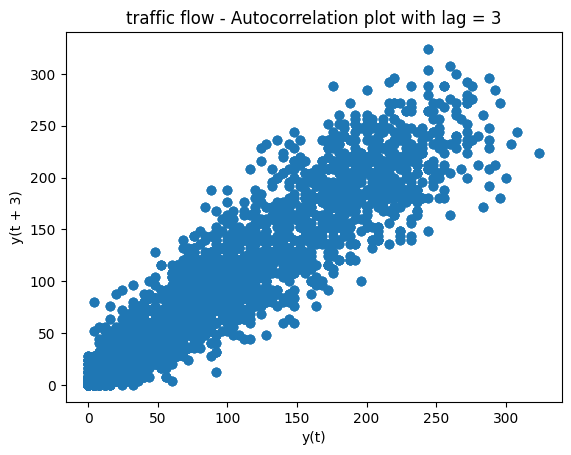

In [5]:
plt.figure()
lag_plot(data['flow'], lag=3)
plt.title('traffic flow - Autocorrelation plot with lag = 3')
plt.show()

In [6]:
print(len(train_set))
print(len(test_set))

7500
2500


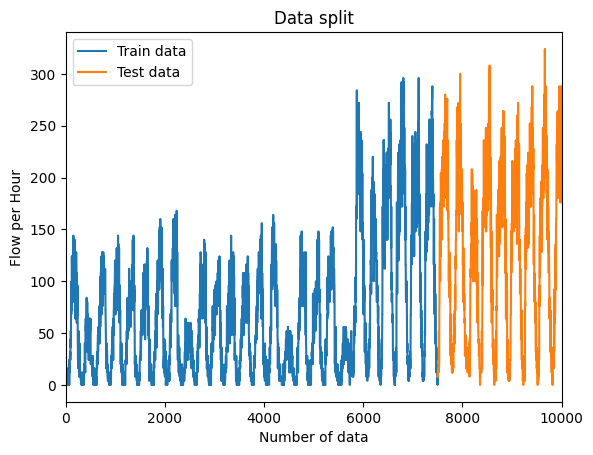

In [7]:
plt.plot(train_set['flow'].index,train_set['flow'].values,label="Train data")
plt.xlim(0,7500)
plt.plot(test_set['flow'].index, test_set['flow'].values,label="Test data")
plt.xlim(0,10000)
plt.title('Data split')
plt.xlabel('Number of data')
plt.ylabel('Flow per Hour')
plt.legend()

In [8]:
xtrain = train_set['flow'].values
xtest = test_set['flow'].values
data_set = data['flow']
data_set.head()

0    12
1    12
2    12
3    16
4    16
Name: flow, dtype: int64

# Train SVR